In [140]:
# import the basic libraries for our dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

In [141]:
# import dataset 
df = pd.read_csv('C:\\Users\\hitesh\\Downloads\\datasets\\soccer_international_history_dataset.csv')
df.head()

,match_date,home_country,away_country,home_score,away_score,match_type,match_city,match_country,home_team_result
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,Draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,Win
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,Win
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,Draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,Win


In [142]:
# check the shape of dataset
df.shape

(38685, 9)

In [143]:
# here we check unique values in home country column
df['home_country'].unique()

array(['Scotland', 'England', 'Wales', 'Northern Ireland', 'USA',
       'Uruguay', 'Austria', 'Hungary', 'Argentina', 'Belgium', 'France',
       'Netherlands', 'Czechoslovakia', 'Switzerland', 'Sweden',
       'Germany', 'Italy', 'Chile', 'Norway', 'Finland', 'Luxembourg',
       'Russia', 'Denmark', 'Brazil', 'Japan', 'Paraguay', 'Canada',
       'Estonia', 'Costa Rica', 'Guatemala', 'Spain', 'Poland',
       'Yugoslavia', 'New Zealand', 'Romania', 'Latvia', 'Portugal',
       'China', 'Australia', 'Lithuania', 'Turkey', 'Mexico', 'Aruba',
       'Egypt', 'Haiti', 'Philippines', 'Bulgaria', 'Jamaica', 'Kenya',
       'Bolivia', 'Peru', 'Honduras', 'Guyana', 'Uganda', 'Belarus',
       'El Salvador', 'Barbados', 'Ireland', 'Trinidad and Tobago',
       'Greece', 'Curaçao', 'Dominica', 'Cuba', 'Guadeloupe', 'Israel',
       'Suriname', 'French Guyana', 'Colombia', 'Ecuador',
       'St Kitts and Nevis', 'Panama', 'Slovakia', 'Manchukuo', 'Croatia',
       'Nicaragua', 'Afghanistan', '

In [144]:
# here we check unique values in match type column
df['match_type'].unique()

array(['Friendly', 'British Championship', 'Copa Lipton', 'Copa Newton',
       'Copa Premio Honor Argentino', 'Copa Premio Honor Uruguayo',
       'Copa Roca', 'Copa América', 'Copa Chevallier Boutell',
       'Nordic Championship', 'International Cup', 'Baltic Cup',
       'Balkan Cup', 'FIFA World Cup', 'Copa Rio Branco',
       'FIFA World Cup qualification', 'CCCF Championship',
       'NAFU Championship', 'Copa Oswaldo Cruz',
       'Pan American Championship', 'Copa del Pacífico',
       "Copa Bernardo O'Higgins", 'AFC Asian Cup qualification',
       'Atlantic Cup', 'AFC Asian Cup', 'African Cup of Nations',
       'Copa Paz del Chaco', 'Merdeka Tournament',
       'UEFA Euro qualification', 'UEFA Euro',
       'Windward Islands Tournament',
       'African Cup of Nations qualification', 'Vietnam Independence Cup',
       'Copa Carlos Dittborn', 'CONCACAF Championship',
       'Copa Juan Pinto Durán', 'UAFA Cup', 'South Pacific Games',
       'CONCACAF Championship qualificatio

In [145]:
df['home_team_result'].unique()

array(['Draw', 'Win', 'Loss'], dtype=object)

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38685 entries, 0 to 38684
Data columns (total 9 columns):
match_date          38685 non-null object
home_country        38685 non-null object
away_country        38685 non-null object
home_score          38685 non-null int64
away_score          38685 non-null int64
match_type          38685 non-null object
match_city          38685 non-null object
match_country       38685 non-null object
home_team_result    38685 non-null object
dtypes: int64(2), object(7)
memory usage: 2.7+ MB


In [147]:
df.isnull().sum()

match_date          0
home_country        0
away_country        0
home_score          0
away_score          0
match_type          0
match_city          0
match_country       0
home_team_result    0
dtype: int64

In [148]:
# data exploration and visualization

In [149]:
df['home_team_result'].value_counts()

Win     18671
Loss    11052
Draw     8962
Name: home_team_result, dtype: int64

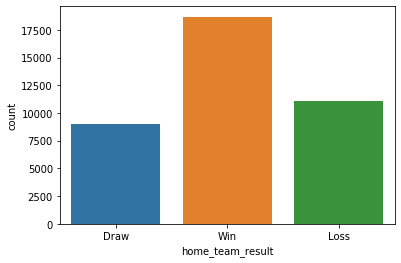

In [150]:
sns.countplot(x = 'home_team_result',data=df)

In [151]:
df['match_type'].value_counts()

Friendly                                16202
FIFA World Cup qualification             7074
UEFA Euro qualification                  2332
African Cup of Nations qualification     1558
FIFA World Cup                            836
Copa América                              787
AFC Asian Cup qualification               711
African Cup of Nations                    638
CFU Caribbean Cup qualification           606
CECAFA Cup                                600
Merdeka Tournament                        504
British Championship                      501
Gulf Cup                                  333
AFC Asian Cup                             319
Gold Cup                                  297
UEFA Euro                                 286
Nordic Championship                       283
AFF Championship                          267
COSAFA Cup                                252
CFU Caribbean Cup                         251
Amílcar Cabral Cup                        235
King's Cup                        

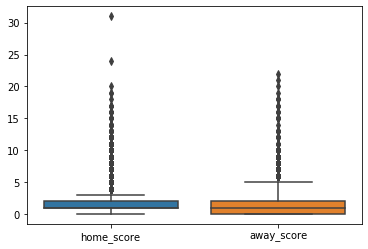

In [152]:
sns.boxplot(data=df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000012EC42E8>,
      dtype=object)

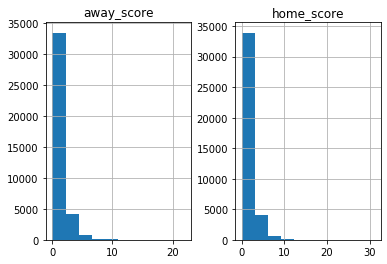

In [153]:
df.hist()

In [154]:
X=df[['home_country','away_country','home_score','away_score','match_type','match_city','match_country']].values
X

array([['Scotland', 'England', 0, ..., 'Friendly', 'Glasgow', 'Scotland'],
       ['England', 'Scotland', 4, ..., 'Friendly', 'London', 'England'],
       ['Scotland', 'England', 2, ..., 'Friendly', 'Glasgow', 'Scotland'],
       ...,
       ['Trinidad and Tobago', 'Guyana', 1, ..., 'Friendly', 'Couva',
        'Trinidad and Tobago'],
       ['Australia', 'Honduras', 3, ..., 'FIFA World Cup qualification',
        'Sydney', 'Australia'],
       ['Peru', 'New Zealand', 2, ..., 'FIFA World Cup qualification',
        'Lima', 'Peru']], dtype=object)

In [155]:
y=df['home_team_result'].values
y

array(['Draw', 'Win', 'Win', ..., 'Draw', 'Win', 'Win'], dtype=object)

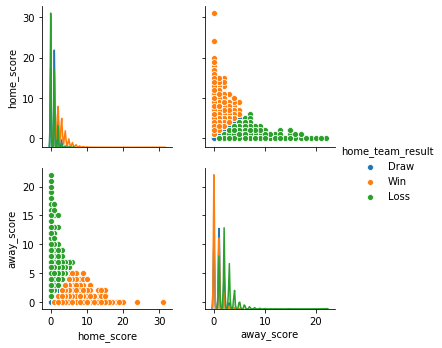

In [156]:
# the pair plot that hepls us to find out to which algorythm we want to use 
sns.pairplot(df,hue='home_team_result')

In [157]:
#from sklearn import preprocessing
#le = preprocessing.LabelEncoder()
#result =le.fit_transform(df['home_team_result'])
#df['home_team_result'] = result

In [158]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['home_country']=le.fit_transform(df['home_country'])
df['away_country']=le.fit_transform(df['away_country'])
df['match_type']=le.fit_transform(df['match_type'])
df['match_city']=le.fit_transform(df['match_city'])
df['match_country']=le.fit_transform(df['match_country'])

In [159]:
X = df[['home_country','away_country','home_score','away_score','match_type','match_city','match_country']].values
X

array([[ 184,   64,    0, ...,   47,  559,  201],
       [  65,  180,    4, ...,   47,  890,   68],
       [ 184,   64,    2, ...,   47,  559,  201],
       ...,
       [ 218,   90,    1, ...,   47,  393,  236],
       [  11,   92,    3, ...,   46, 1528,   10],
       [ 170,  151,    2, ...,   46,  870,  184]], dtype=int64)

In [160]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 3)
drugtree = DecisionTreeClassifier(criterion = 'entropy',max_depth = 4)
drugtree 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [161]:
drugtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [162]:
drugtree.predict(X_test)

array(['Win', 'Loss', 'Loss', ..., 'Draw', 'Win', 'Win'], dtype=object)

In [163]:
drugtree.score(X_test,y_test)

0.9867310012062727

In [169]:
from sklearn.metrics import confusion_matrix
cnfmt = confusion_matrix(y_test,drugtree.predict(X_test))
print(cnfmt)

[[2672    0    0]
 [  61 3237    0]
 [  93    0 5543]]


In [168]:
from sklearn.metrics import classification_report
clfr = classification_report(y_test,drugtree.predict(X_test))
print(clfr)

              precision    recall  f1-score   support

        Draw       0.95      1.00      0.97      2672
        Loss       1.00      0.98      0.99      3298
         Win       1.00      0.98      0.99      5636

    accuracy                           0.99     11606
   macro avg       0.98      0.99      0.98     11606
weighted avg       0.99      0.99      0.99     11606



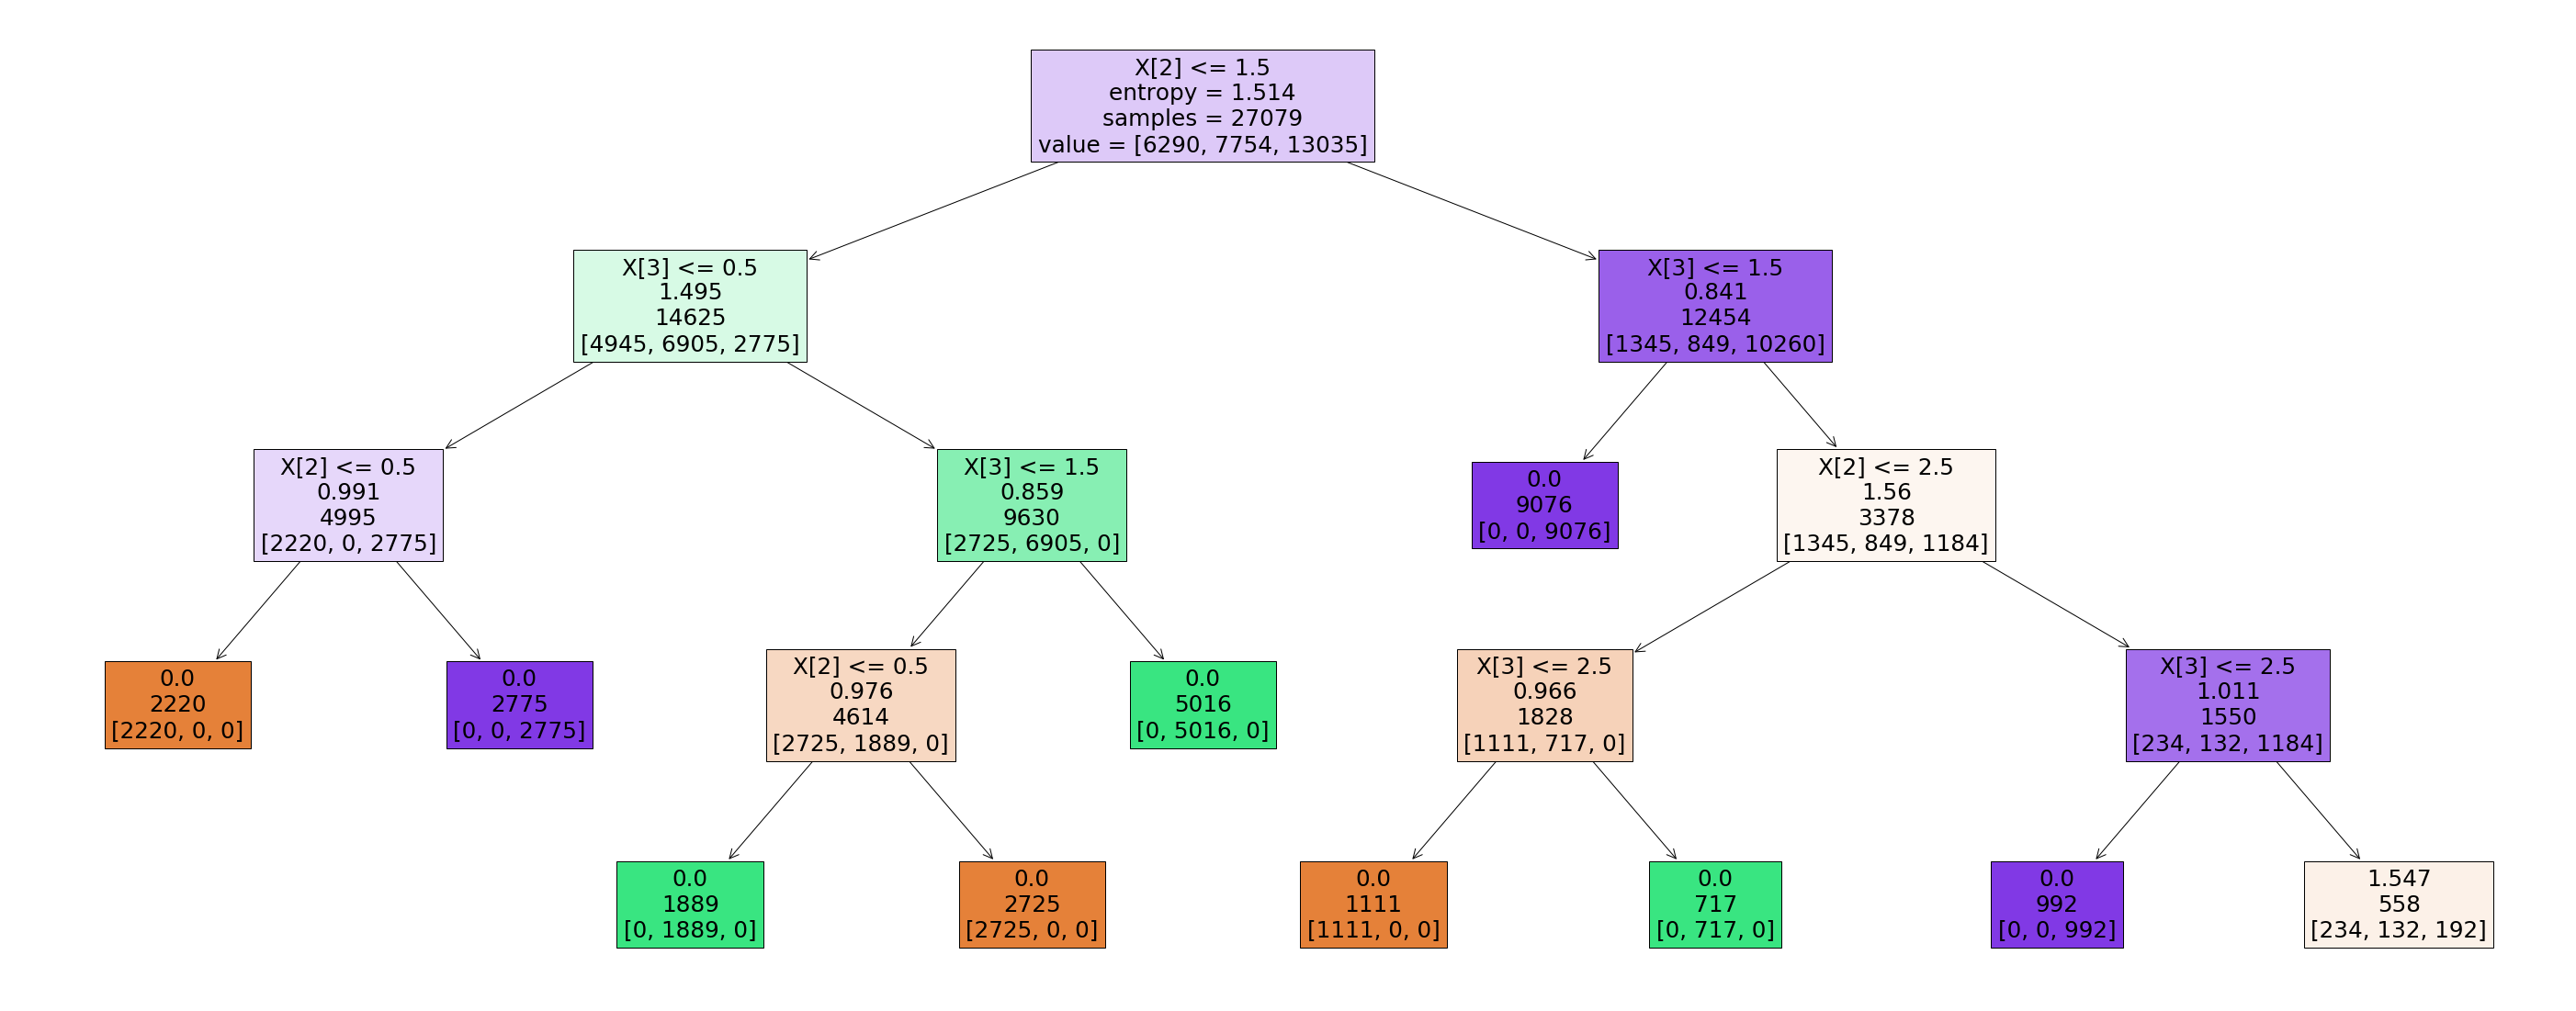

In [167]:
from sklearn.tree import plot_tree
plt.figure(figsize=(50,20))
plot_tree(drugtree, filled=True, label='root' )
plt.savefig('tree', )